In [ ]:
import numpy as np
import math
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage.exposure import rescale_intensity
from PIL import Image 
import matplotlib.pylab as plt

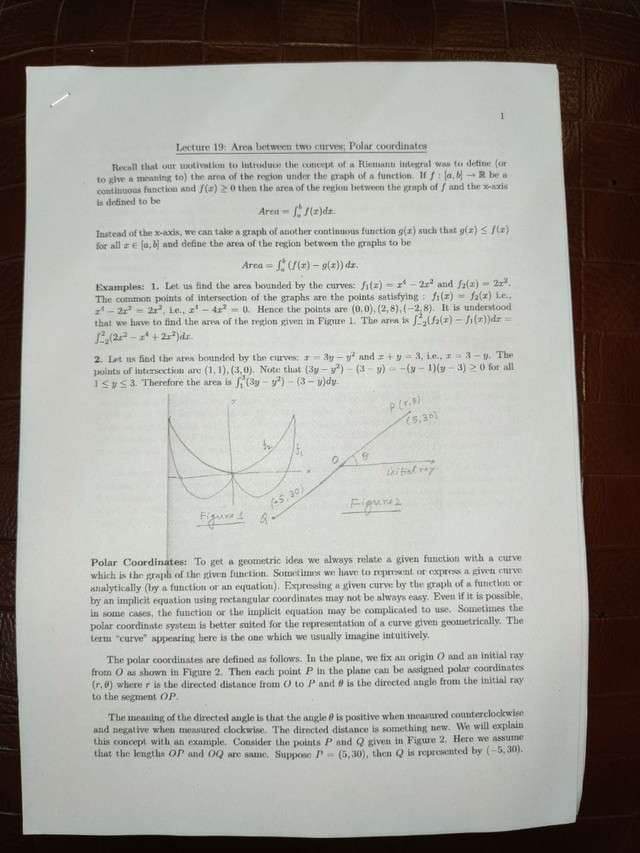

In [ ]:
# inputing image

url="https://i.ibb.co/wJ5BZvr/Whats-App-Image-2021-06-08-at-20-31-23.jpg"
      
img = io.imread(url) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
# image_ctrg = cv.cvtColor(image_ctr, cv.COLOR_BGR2GRAY)

cv2_imshow(img)


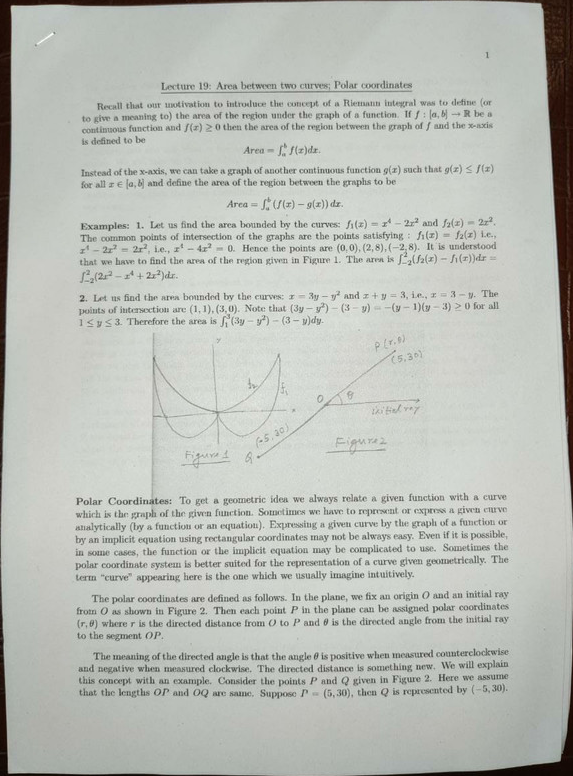

In [ ]:
# finding out the edges and cropping it

blurred = cv.blur(img, (3,3))
canny = cv.Canny(blurred, 50, 200)

pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

img= img[y1:y2, x1:x2]

cv2_imshow(img)


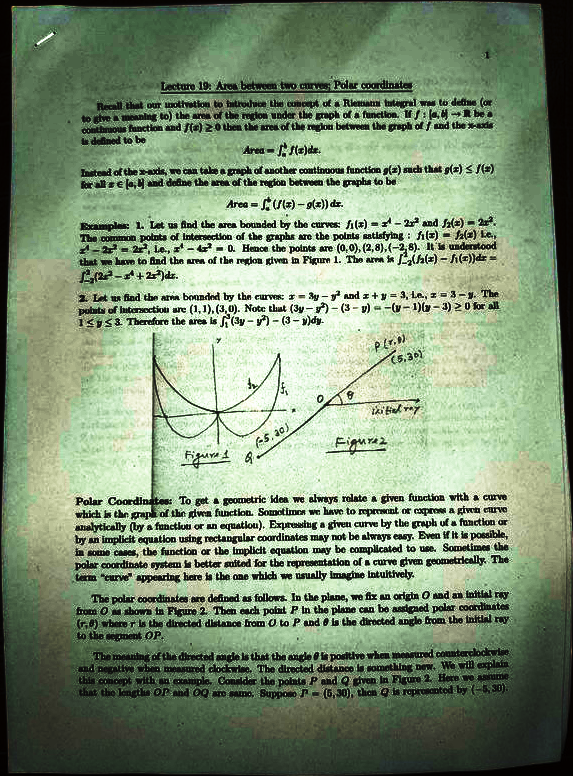

In [ ]:
#adding contrast

pixel_count = img.shape[0]*img.shape[1]
# pmf_dist = hist/pixel_count

hist_np,bins = np.histogram(img.flatten(),256,[0,256])
pmf_dist_np = hist_np/pixel_count

cdf = pmf_dist_np.cumsum()

cdf_normalized = cdf * float(pmf_dist_np.max())

cdf_m = np.ma.masked_equal(hist_np.cumsum(),0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img= cdf[img]
cv2_imshow(img)


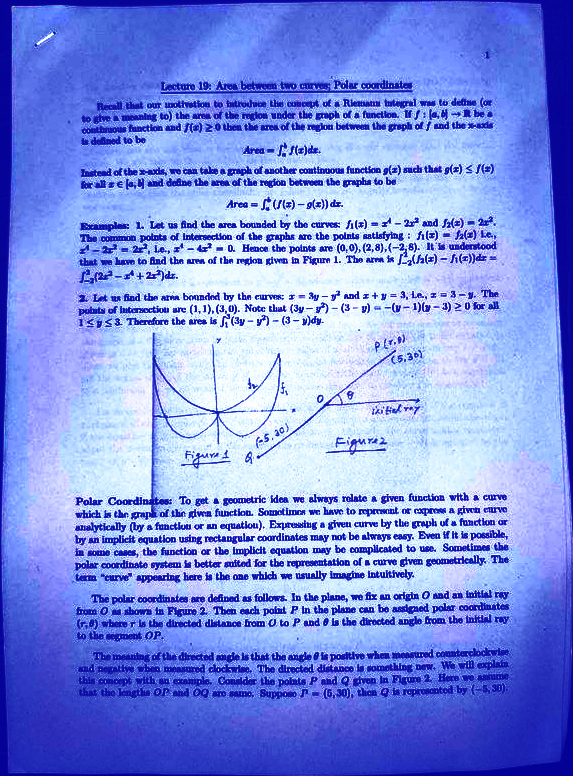

In [ ]:
# adding brightness
img= cv.add(img, 150)
cv2_imshow(img)

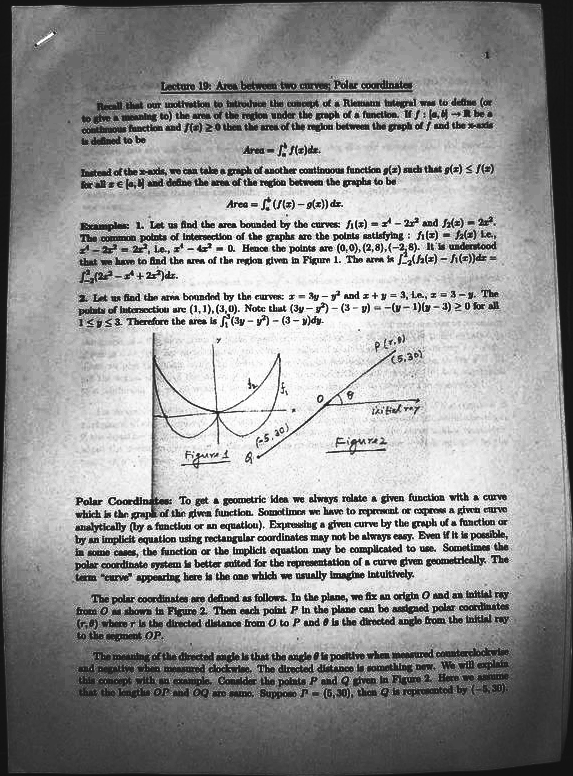

In [ ]:
# greyscaling the image
img= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)


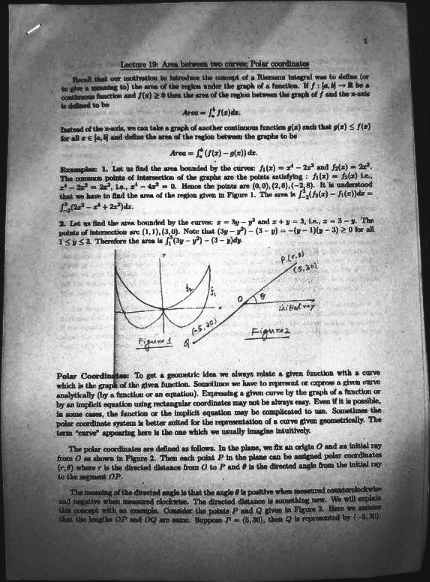

In [ ]:
#risizing the picture

img= cv.resize(img, (0,0), fx=0.75, fy=0.75) 
cv2_imshow(img)

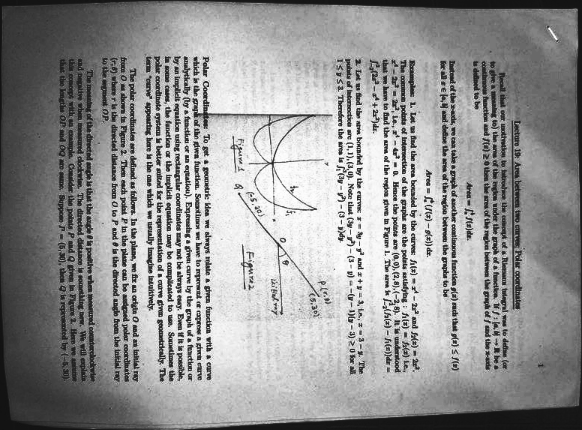

In [ ]:
# rotating by 90 clockwise
img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
cv2_imshow(img)

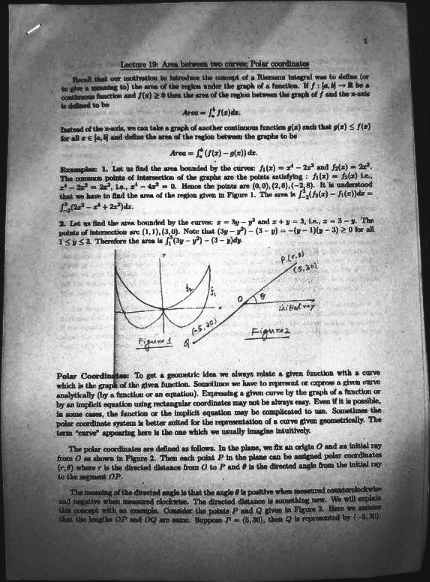

In [ ]:
# rotating by 90 anticlockwise
img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img)

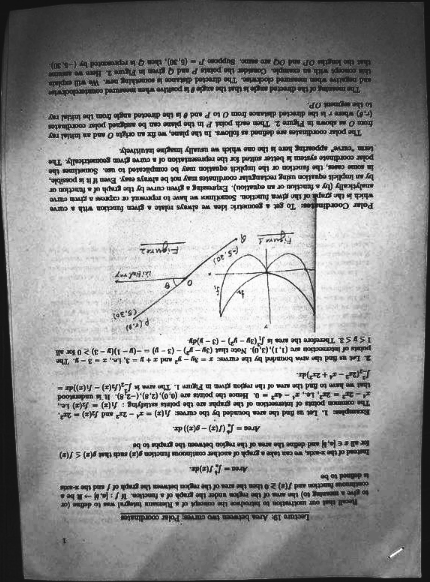

In [ ]:
# rotating by 180
img = cv.rotate(img, cv.ROTATE_180)
cv2_imshow(img)

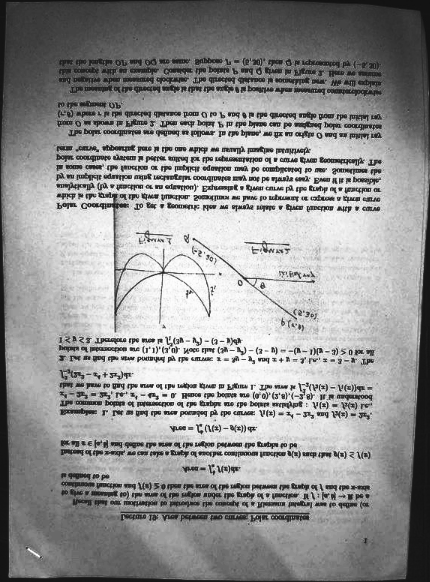

In [ ]:
#flipping horizontally
img = cv.flip(img, 1)
cv2_imshow(img)

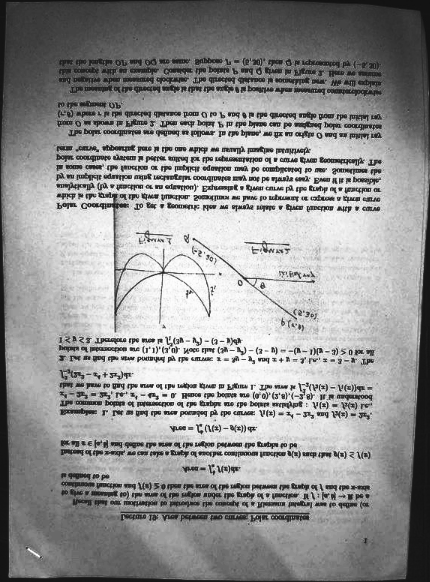

In [ ]:
#final image show
cv2_imshow(img)